### Imports dataset

In [2]:
import sys
import pandas as pd

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

n = 800000
tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

def has_t2_columns(df):
    """Check if the dataframe contains T2 columns"""
    return any(col.startswith('T2_') for col in df.columns)

### Dataset Structure:

In [3]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,0.017853,0.531247,0.041866,0.356274,0.551609,0.644354,0.292449,0.881942,0.023474,0.226825,...,0.067741,0.266837,0.136241,0.976802,0.936502,0.434947,0.551810,0.829580,0.0,0
1,0.194328,0.476922,0.154563,0.457877,0.321010,0.300046,0.275279,0.186779,0.763020,0.660141,...,0.173643,0.624772,0.116444,0.448587,0.284738,0.340675,0.463347,0.344060,0.0,1
2,0.813388,0.826174,0.139436,0.454383,0.288012,0.049310,0.901407,0.938544,0.642644,0.796110,...,0.265901,0.234351,0.762849,0.729998,0.511937,0.743451,0.705986,0.621196,0.0,0
3,0.917030,0.604258,0.830503,0.106652,0.083649,0.006663,0.898002,0.815262,0.671542,0.336792,...,0.559668,0.406003,0.522621,0.497428,1.034272,0.812168,0.062429,0.249287,0.0,1
4,0.923114,0.970677,0.885102,0.701595,0.108256,0.805436,0.148733,0.842740,0.285699,0.454746,...,0.800759,0.577827,0.610807,0.841416,0.651997,0.389760,0.762647,0.725860,0.0,1


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [4]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000
mean,0.500101,0.500422,0.499878,0.499829,0.499872,0.499708,0.499569,0.499798,0.499427,0.500063,...,0.499405,0.499316,0.500138,0.499789,0.499435,0.500020,0.499778,0.500078,2.399273e+05,0.570000
std,0.291296,0.291412,0.291019,0.291549,0.291546,0.291630,0.291787,0.291861,0.291872,0.290425,...,0.285042,0.284585,0.283370,0.285144,0.285292,0.279791,0.284881,0.284457,4.855562e+05,0.495076
min,-0.250841,-0.282071,-0.240281,-0.290470,-0.291848,-0.238935,-0.346197,-0.273750,-0.210553,-0.036506,...,-0.310435,-0.362713,-0.346197,-0.310435,-0.362713,-0.293979,-0.278193,-0.299234,0.000000e+00,0.000000
25%,0.246292,0.246311,0.246330,0.245090,0.245405,0.244771,0.244657,0.244488,0.244055,0.247245,...,0.257984,0.258478,0.260851,0.257716,0.257373,0.266752,0.257134,0.258545,0.000000e+00,0.000000
50%,0.499889,0.500586,0.499943,0.500196,0.499568,0.499796,0.499241,0.499508,0.499137,0.499997,...,0.499639,0.499160,0.500299,0.499537,0.499242,0.500514,0.499872,0.500111,0.000000e+00,1.000000
75%,0.754346,0.754870,0.753464,0.754298,0.754437,0.754515,0.754669,0.754935,0.754591,0.752625,...,0.740819,0.740135,0.739066,0.741962,0.741691,0.732750,0.741882,0.741902,1.340400e+05,1.000000
max,1.245314,1.314201,1.314695,1.326647,1.272174,1.259693,1.249447,1.256121,1.249163,1.062003,...,1.340229,1.316206,1.282131,1.299388,1.307527,1.313054,1.299388,1.289026,1.999990e+06,1.000000


#### Class Balance

In [5]:
total_entries = len(tetrahedron_dataset)

# Basic intersection status counts
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

# Volume-based breakdown
has_intersection = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1]
intersecting_with_volume = has_intersection[has_intersection['IntersectionVolume'] > 0]
intersecting_zero_volume = has_intersection[has_intersection['IntersectionVolume'] == 0]

# Calculate percentages
percentage_no_intersection = (status_0_count / total_entries) * 100
percentage_has_intersection = (status_1_count / total_entries) * 100
percentage_volume_gt_zero = (len(intersecting_with_volume) / total_entries) * 100
percentage_volume_eq_zero = (len(intersecting_zero_volume) / total_entries) * 100

print("=== Class Balance Analysis ===")
print(f"Total samples: {total_entries:,}")
print()
print("Basic Classification:")
print(f"  No intersection (HasIntersection = 0): {status_0_count:,} ({percentage_no_intersection:.2f}%)")
print(f"  Has intersection (HasIntersection = 1): {status_1_count:,} ({percentage_has_intersection:.2f}%)")
print()
print("Volume-based Classification:")
print(f"  No intersection: {status_0_count:,} ({percentage_no_intersection:.2f}%)")
print(f"  Touching only (volume = 0): {len(intersecting_zero_volume):,} ({percentage_volume_eq_zero:.2f}%)")
print(f"  Actual overlap (volume > 0): {len(intersecting_with_volume):,} ({percentage_volume_gt_zero:.2f}%)")
print()
print("Key Insights:")
print(f"  • {percentage_volume_gt_zero:.2f}% of all samples have meaningful volumetric intersection")
print(f"  • {percentage_volume_eq_zero:.2f}% of all samples are just touching (no volume overlap)")
print(f"  • Of intersecting cases, {len(intersecting_with_volume)/status_1_count*100:.1f}% have actual volume")
print(f"  • Of intersecting cases, {len(intersecting_zero_volume)/status_1_count*100:.1f}% are touching only")

# Verification
total_check = status_0_count + len(intersecting_with_volume) + len(intersecting_zero_volume)
print(f"\nVerification: {total_check:,} = {total_entries:,} ✓" if total_check == total_entries else f"\nError: {total_check:,} ≠ {total_entries:,}")

=== Class Balance Analysis ===
Total samples: 1,000,000

Basic Classification:
  No intersection (HasIntersection = 0): 430,000 (43.00%)
  Has intersection (HasIntersection = 1): 570,000 (57.00%)

Volume-based Classification:
  No intersection: 430,000 (43.00%)
  Touching only (volume = 0): 300,000 (30.00%)
  Actual overlap (volume > 0): 270,000 (27.00%)

Key Insights:
  • 27.00% of all samples have meaningful volumetric intersection
  • 30.00% of all samples are just touching (no volume overlap)
  • Of intersecting cases, 47.4% have actual volume
  • Of intersecting cases, 52.6% are touching only

Verification: 1,000,000 = 1,000,000 ✓


#### Coordinates precision

In [6]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')
max_precision_value = None
min_precision_value = None
max_precision_column = None
min_precision_column = None

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    col_max_precision = col_precision.max()
    col_min_precision = col_precision.min()
    
    # Update global max
    if col_max_precision > max_precision:
        max_precision = col_max_precision
        max_precision_idx = col_precision.idxmax()
        max_precision_value = tetrahedron_dataset.loc[max_precision_idx, col]
        max_precision_column = col
    
    # Update global min
    if col_min_precision < min_precision:
        min_precision = col_min_precision
        min_precision_idx = col_precision.idxmin()
        min_precision_value = tetrahedron_dataset.loc[min_precision_idx, col]
        min_precision_column = col
print("=== Coordinate Precision Analysis ===")
print(f"Min coordinate precision: {min_precision} decimal places")
print(f"  Example: {min_precision_value} (from {min_precision_column})")
print(f"Max coordinate precision: {max_precision} decimal places")
print(f"  Example: {max_precision_value} (from {max_precision_column})")

=== Coordinate Precision Analysis ===
Min coordinate precision: 1 decimal places
  Example: 0.5 (from T2_v2_y)
Max coordinate precision: 20 decimal places
  Example: 1.0990072041749954e-05 (from T1_v1_x)


#### Coordinates distribution

=== Coordinate Analysis ===
Total coordinate values: 24,000,000
Expected range: [0, 1]
Actual range: [-0.362713, 1.340229]
Mean: 0.4998 (should be ~0.5 for uniform)
Std: 0.2876


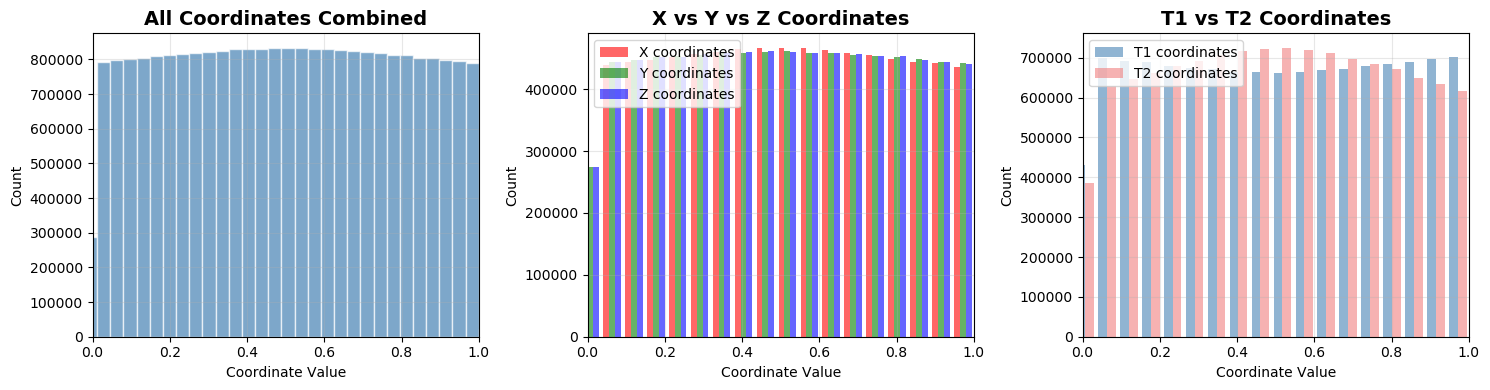


=== Uniformity Check ===
For uniform distribution [0,1]:
  Expected mean: 0.500
  Actual mean:   0.499829
  Expected std:  ~0.289
  Actual std:    0.287627
✓ Coordinates appear uniformly distributed (mean within 0.01 of 0.5)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

print("=== Coordinate Analysis ===")

# Get all coordinates together
all_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns])

print(f"Total coordinate values: {len(all_coords):,}")
print(f"Expected range: [0, 1]")
print(f"Actual range: [{all_coords.min():.6f}, {all_coords.max():.6f}]")
print(f"Mean: {all_coords.mean():.4f} (should be ~0.5 for uniform)")
print(f"Std: {all_coords.std():.4f}")

# Simple overview plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Simple histogram of ALL coordinates
axes[0].hist(all_coords, bins=50, color='steelblue', alpha=0.7, edgecolor='white')
axes[0].set_title('All Coordinates Combined', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Coordinate Value')
axes[0].set_ylabel('Count')
axes[0].set_xlim(0, 1)
axes[0].grid(True, alpha=0.3)

# Plot 2: Compare X, Y, Z coordinates
x_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.endswith('_x')])
y_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.endswith('_y')])
z_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.endswith('_z')])

axes[1].hist([x_coords, y_coords, z_coords], bins=30, alpha=0.6, 
            label=['X coordinates', 'Y coordinates', 'Z coordinates'],
            color=['red', 'green', 'blue'])
axes[1].set_title('X vs Y vs Z Coordinates', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Coordinate Value')
axes[1].set_ylabel('Count')
axes[1].set_xlim(0, 1)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: T1 vs T2 comparison (if T2 exists)
if has_t2_columns(tetrahedron_dataset):
    t1_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.startswith('T1')])
    t2_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.startswith('T2')])
    
    axes[2].hist([t1_coords, t2_coords], bins=30, alpha=0.6,
                label=['T1 coordinates', 'T2 coordinates'],
                color=['steelblue', 'lightcoral'])
    axes[2].set_title('T1 vs T2 Coordinates', fontsize=14, fontweight='bold')
    axes[2].legend()
else:
    axes[2].hist(all_coords, bins=30, color='steelblue', alpha=0.7)
    axes[2].set_title('T1 Coordinates Only', fontsize=14, fontweight='bold')

axes[2].set_xlabel('Coordinate Value')
axes[2].set_ylabel('Count')
axes[2].set_xlim(0, 1)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Quick statistical test for uniformity
print("\n=== Uniformity Check ===")
print("For uniform distribution [0,1]:")
print(f"  Expected mean: 0.500")
print(f"  Actual mean:   {all_coords.mean():.6f}")
print(f"  Expected std:  ~0.289")  # sqrt(1/12) for uniform [0,1]
print(f"  Actual std:    {all_coords.std():.6f}")

mean_diff = abs(all_coords.mean() - 0.5)
if mean_diff < 0.01:
    print(f"✓ Coordinates appear uniformly distributed (mean within 0.01 of 0.5)")
else:
    print(f"⚠ Coordinates may not be uniformly distributed (mean differs by {mean_diff:.6f})")

#### Tetrahedron volume distribution

Starting volume calculations...
Processing row 0 / 1,000,000
Processing row 500,000 / 1,000,000
Volume calculations complete!
=== Tetrahedron Volume Analysis ===
T1 volumes: n=1,000,000
T1 range: 4.71e-13 to 1.75e-01
T1 mean: 1.79e-02
T2 volumes: n=1,000,000
T2 range: 0.00e+00 to 1.88e-01
T2 mean: 1.52e-02

Volume Sign Analysis:
T1 positive volumes: 1,000,000 (100.0%)
T1 negative volumes: 0 (0.0%)
T2 positive volumes: 999,993 (100.0%)
T2 negative volumes: 0 (0.0%)

Quadrant Analysis:
Both positive: 999,993 (100.0%)
Both negative: 0 (0.0%)
Mixed signs: 7 (0.0%)


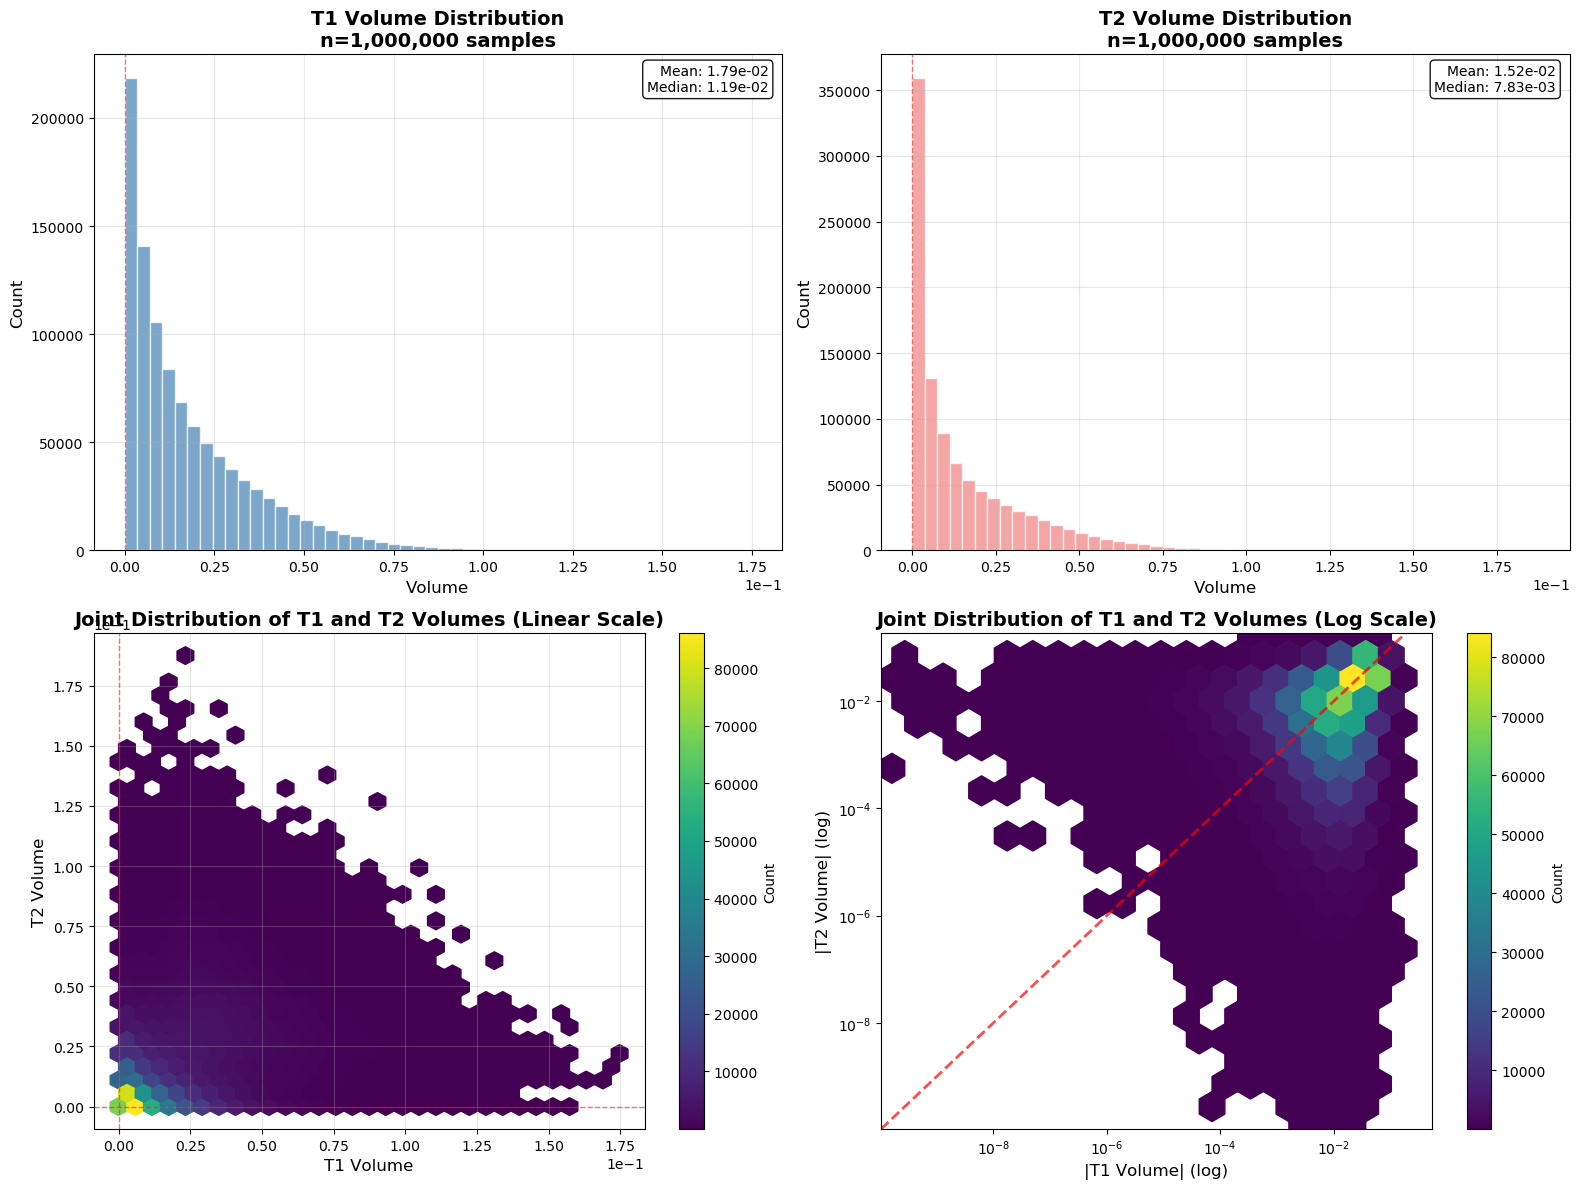


Volume Statistics:
T1 - Mean: 1.79e-02, Std: 1.81e-02
T1 - Range: 4.71e-13 to 1.75e-01
T2 - Mean: 1.52e-02, Std: 1.81e-02
T2 - Range: 0.00e+00 to 1.88e-01

Distribution Comparison:
Mean difference (|T1 - T2|): 2.73e-03
Std difference (|T1 - T2|): 5.45e-05


In [8]:
### Tetrahedron Volume Analysis ###
import src.GeometryUtils as gu
import torch
import numpy as np
import matplotlib.pyplot as plt

def extract_t1_vertices(row):
    """Extract T1 tetrahedron vertices from a DataFrame row"""
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ], dtype=torch.float64)

def extract_t2_vertices(row):
    """Extract T2 tetrahedron vertices from a DataFrame row"""
    return torch.tensor([
        [row['T2_v1_x'], row['T2_v1_y'], row['T2_v1_z']],
        [row['T2_v2_x'], row['T2_v2_y'], row['T2_v2_z']],
        [row['T2_v3_x'], row['T2_v3_y'], row['T2_v3_z']],
        [row['T2_v4_x'], row['T2_v4_y'], row['T2_v4_z']]
    ], dtype=torch.float64)

# === Volume Calculation ===
print("Starting volume calculations...")
t1_volumes = []
t2_volumes = []

# Process all rows with progress tracking
total_rows = len(tetrahedron_dataset)
for i, (_, row) in enumerate(tetrahedron_dataset.iterrows()):
    if i % 500000 == 0:  # Progress every 500k rows
        print(f"Processing row {i:,} / {total_rows:,}")
    
    try:
        # Calculate T1 volume
        t1_vertices = extract_t1_vertices(row)
        volume_t1 = gu.calculate_tetrahedron_volume(t1_vertices)
        t1_volumes.append(volume_t1.item())
        
        # Calculate T2 volume if T2 columns exist
        if has_t2_columns(tetrahedron_dataset):
            t2_vertices = extract_t2_vertices(row)
            volume_t2 = gu.calculate_tetrahedron_volume(t2_vertices)
            t2_volumes.append(volume_t2.item())
    except Exception as e:
        print(f"Error processing row {i}: {e}")
        continue

print("Volume calculations complete!")

# Convert to numpy arrays for analysis
volumes_t1 = np.array(t1_volumes)
volumes_t2 = np.array(t2_volumes) if t2_volumes else None

# === Basic Volume Statistics ===
print("=== Tetrahedron Volume Analysis ===")
print(f"T1 volumes: n={len(volumes_t1):,}")
print(f"T1 range: {volumes_t1.min():.2e} to {volumes_t1.max():.2e}")
print(f"T1 mean: {volumes_t1.mean():.2e}")

if volumes_t2 is not None:
    print(f"T2 volumes: n={len(volumes_t2):,}")
    print(f"T2 range: {volumes_t2.min():.2e} to {volumes_t2.max():.2e}")
    print(f"T2 mean: {volumes_t2.mean():.2e}")

# === Volume Sign Analysis (since volumes can be positive/negative) ===
print(f"\nVolume Sign Analysis:")
print(f"T1 positive volumes: {np.sum(volumes_t1 > 0):,} ({np.sum(volumes_t1 > 0)/len(volumes_t1)*100:.1f}%)")
print(f"T1 negative volumes: {np.sum(volumes_t1 < 0):,} ({np.sum(volumes_t1 < 0)/len(volumes_t1)*100:.1f}%)")

if volumes_t2 is not None:
    print(f"T2 positive volumes: {np.sum(volumes_t2 > 0):,} ({np.sum(volumes_t2 > 0)/len(volumes_t2)*100:.1f}%)")
    print(f"T2 negative volumes: {np.sum(volumes_t2 < 0):,} ({np.sum(volumes_t2 < 0)/len(volumes_t2)*100:.1f}%)")
    
    # Quadrant analysis for joint distribution
    both_positive = np.sum((volumes_t1 > 0) & (volumes_t2 > 0))
    both_negative = np.sum((volumes_t1 < 0) & (volumes_t2 < 0))
    mixed_signs = len(volumes_t1) - both_positive - both_negative
    
    print(f"\nQuadrant Analysis:")
    print(f"Both positive: {both_positive:,} ({both_positive/len(volumes_t1)*100:.1f}%)")
    print(f"Both negative: {both_negative:,} ({both_negative/len(volumes_t1)*100:.1f}%)")
    print(f"Mixed signs: {mixed_signs:,} ({mixed_signs/len(volumes_t1)*100:.1f}%)")

# === Visualization ===
if has_t2_columns(tetrahedron_dataset) and volumes_t2 is not None:
    # Four-panel comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Panel 1: T1 volume distribution
    axes[0,0].hist(volumes_t1, bins=50, color='steelblue', alpha=0.7, edgecolor='white')
    axes[0,0].set_title(f'T1 Volume Distribution\nn={len(volumes_t1):,} samples', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Volume', fontsize=12)
    axes[0,0].set_ylabel('Count', fontsize=12)
    axes[0,0].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    axes[0,0].grid(alpha=0.3)
    axes[0,0].axvline(x=0, color='red', linestyle='--', alpha=0.5, linewidth=1)  # Zero reference
    
    # Add T1 statistics
    mean_t1 = volumes_t1.mean()
    median_t1 = np.median(volumes_t1)
    axes[0,0].text(0.98, 0.98, f'Mean: {mean_t1:.2e}\nMedian: {median_t1:.2e}', 
                   transform=axes[0,0].transAxes, fontsize=10, 
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))
    
    # Panel 2: T2 volume distribution
    axes[0,1].hist(volumes_t2, bins=50, color='lightcoral', alpha=0.7, edgecolor='white')
    axes[0,1].set_title(f'T2 Volume Distribution\nn={len(volumes_t2):,} samples', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Volume', fontsize=12)
    axes[0,1].set_ylabel('Count', fontsize=12)
    axes[0,1].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    axes[0,1].grid(alpha=0.3)
    axes[0,1].axvline(x=0, color='red', linestyle='--', alpha=0.5, linewidth=1)  # Zero reference
    
    # Add T2 statistics
    mean_t2 = volumes_t2.mean()
    median_t2 = np.median(volumes_t2)
    axes[0,1].text(0.98, 0.98, f'Mean: {mean_t2:.2e}\nMedian: {median_t2:.2e}', 
                   transform=axes[0,1].transAxes, fontsize=10, 
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))
    
    # Panel 3: Joint Distribution of T1 and T2 Volumes (Linear Scale)
    hb_linear = axes[1,0].hexbin(volumes_t1, volumes_t2, gridsize=30, cmap='viridis', mincnt=1)
    axes[1,0].set_title('Joint Distribution of T1 and T2 Volumes (Linear Scale)', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('T1 Volume', fontsize=12)
    axes[1,0].set_ylabel('T2 Volume', fontsize=12)
    axes[1,0].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    axes[1,0].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    axes[1,0].grid(alpha=0.3)
    axes[1,0].axvline(x=0, color='red', linestyle='--', alpha=0.5, linewidth=1)  # Zero reference for T1
    axes[1,0].axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1)  # Zero reference for T2
    fig.colorbar(hb_linear, ax=axes[1,0], label='Count')
    
    # Panel 4: Joint distribution (log scale)
    abs_volumes_t1 = np.abs(volumes_t1)
    abs_volumes_t2 = np.abs(volumes_t2)
    
    # Filter out zero and very small values for log scale (log scale requires positive values)
    log_mask = (abs_volumes_t1 > 1e-10) & (abs_volumes_t2 > 1e-10)
    vol_t1_clean = abs_volumes_t1[log_mask]
    vol_t2_clean = abs_volumes_t2[log_mask]
    
    if len(vol_t1_clean) > 100:
        hb = axes[1,1].hexbin(vol_t1_clean, vol_t2_clean, gridsize=20, cmap='viridis', 
                              xscale='log', yscale='log', mincnt=1)
        
        axes[1,1].set_title('Joint Distribution of T1 and T2 Volumes (Log Scale)', fontsize=14, fontweight='bold')
        axes[1,1].set_xlabel('|T1 Volume| (log)', fontsize=12)
        axes[1,1].set_ylabel('|T2 Volume| (log)', fontsize=12)
        
        # Add diagonal line for reference
        min_val = min(vol_t1_clean.min(), vol_t2_clean.min())
        max_val = max(vol_t1_clean.max(), vol_t2_clean.max())
        axes[1,1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.7, linewidth=2)
        
        # Single, clean colorbar
        fig.colorbar(hb, ax=axes[1,1], label='Count')
        
    else:
        axes[1,1].text(0.5, 0.5, 'Insufficient positive data for log visualization', 
                       transform=axes[1,1].transAxes, ha='center', va='center', fontsize=12)
        axes[1,1].set_title('Joint Distribution of T1 and T2 Volumes (Log Scale)', fontsize=14, fontweight='bold')

else:
    # Single plot for T1 only (fallback case)
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.hist(volumes_t1, bins=50, color='steelblue', alpha=0.7, edgecolor='white')
    ax.set_title(f'T1 Volume Distribution\nn={len(volumes_t1):,} samples', fontsize=14, fontweight='bold')
    ax.set_xlabel('Volume', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    ax.grid(alpha=0.3)
    ax.axvline(x=0, color='red', linestyle='--', alpha=0.5, linewidth=1)  # Zero reference
    
    # Add statistics
    mean_t1 = volumes_t1.mean()
    median_t1 = np.median(volumes_t1)
    ax.text(0.98, 0.98, f'Mean: {mean_t1:.2e}\nMedian: {median_t1:.2e}', 
            transform=ax.transAxes, fontsize=10, 
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

# === Summary Statistics ===
print(f"\nVolume Statistics:")
print(f"T1 - Mean: {volumes_t1.mean():.2e}, Std: {volumes_t1.std():.2e}")
print(f"T1 - Range: {volumes_t1.min():.2e} to {volumes_t1.max():.2e}")

if volumes_t2 is not None:
    print(f"T2 - Mean: {volumes_t2.mean():.2e}, Std: {volumes_t2.std():.2e}")
    print(f"T2 - Range: {volumes_t2.min():.2e} to {volumes_t2.max():.2e}")
    
    # Distribution comparison instead of correlation
    print(f"\nDistribution Comparison:")
    print(f"Mean difference (|T1 - T2|): {abs(volumes_t1.mean() - volumes_t2.mean()):.2e}")
    print(f"Std difference (|T1 - T2|): {abs(volumes_t1.std() - volumes_t2.std()):.2e}")

Distribution centered around zero: No


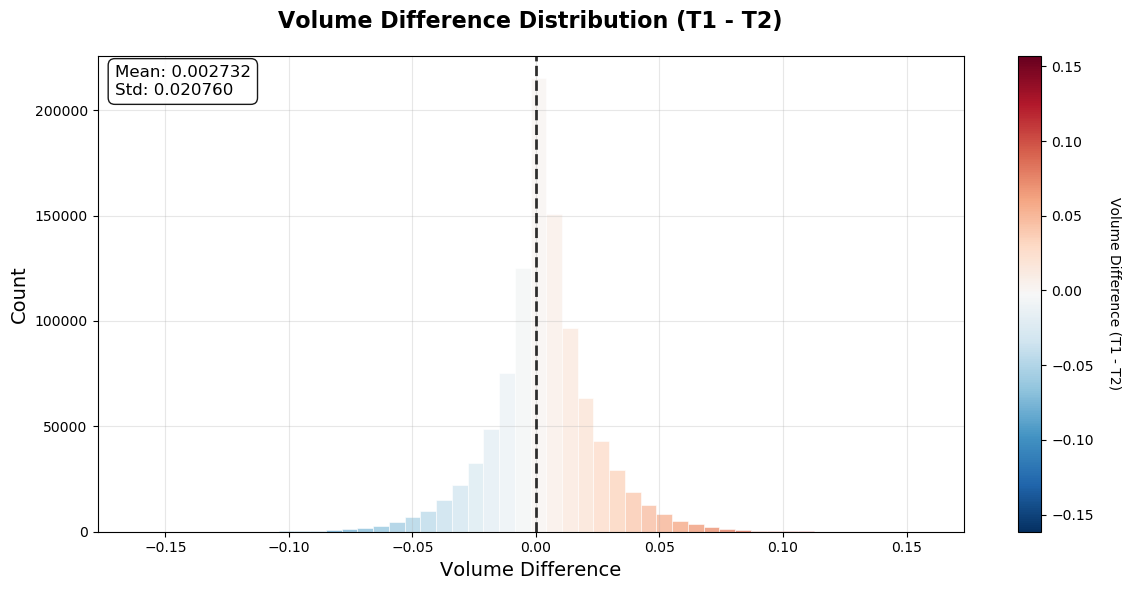

=== Volume Difference Analysis (T1 - T2) ===

Total samples: 1,000,000
Range: -0.16152379 to 0.15714052
Mean difference: 0.00273162
Median difference: 0.00221474
Standard deviation: 0.02075969
Positive differences (T1 > T2): 58.5%
Negative differences (T2 > T1): 41.5%
Zero differences: 0.0%


In [9]:
### === Volume Difference Analysis (T1 - T2) ===
if has_t2_columns(tetrahedron_dataset):
    # Calculate the difference in volumes
    volume_diff = np.array(t1_volumes) - np.array(t2_volumes)

    # Check if distribution is centered around zero (expected for random tetrahedra)
    zero_centered = abs(volume_diff.mean()) < volume_diff.std() * 0.1
    print(f"Distribution centered around zero: {'Yes' if zero_centered else 'No'}")
    
    # Simple, clean plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create histogram with color mapping based on bin centers
    counts, bins, patches = ax.hist(volume_diff, bins=50, alpha=0.8, edgecolor='white', linewidth=0.5)
    
    # Color the bars based on their position relative to zero
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Normalize colors based on distance from zero
    norm = plt.Normalize(vmin=volume_diff.min(), vmax=volume_diff.max())
    colors = plt.cm.RdBu_r(norm(bin_centers))  # Red-Blue colormap (reversed)
    
    # Apply colors to patches
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Volume Difference (T1 - T2)', rotation=270, labelpad=20)
    
    # Add zero reference line
    ax.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.8)
    
    # Clean formatting
    ax.set_title('Volume Difference Distribution (T1 - T2)', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Volume Difference', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.grid(True, alpha=0.3)
    
    # Add simple stats in corner
    stats_text = f'Mean: {volume_diff.mean():.6f}\nStd: {volume_diff.std():.6f}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9))
    
    plt.tight_layout()
    plt.show()
    
    print(f"=== Volume Difference Analysis (T1 - T2) ===\n")
    print(f"Total samples: {len(volume_diff):,}")
    print(f"Range: {volume_diff.min():.8f} to {volume_diff.max():.8f}")
    print(f"Mean difference: {volume_diff.mean():.8f}")
    print(f"Median difference: {np.median(volume_diff):.8f}")
    print(f"Standard deviation: {volume_diff.std():.8f}")
    print(f"Positive differences (T1 > T2): {np.sum(volume_diff > 0) / len(volume_diff) * 100:.1f}%")
    print(f"Negative differences (T2 > T1): {np.sum(volume_diff < 0) / len(volume_diff) * 100:.1f}%")
    print(f"Zero differences: {np.sum(volume_diff == 0) / len(volume_diff) * 100:.1f}%")
    
else:
    print("No T2 columns found - cannot compute volume differences")

#### Intersection volume distribution

=== Intersection Volume Analysis ===
Total samples: 1,000,000
No intersection (HasIntersection=0): 430,000 (43.0%)
Has intersection (HasIntersection=1): 570,000 (57.0%)
  ├─ With volume > 0: 270,000 (27.0%)
  └─ With volume = 0 (touching): 300,000 (30.0%)

Intersection Volume Statistics (for volume > 0 cases):
(Note during training volumes are scaled up by a factor of 1e8 for training stability, here showing original values)
  Mean: 8.89e-03
  Median: 8.52e-03
  Min: 9.54e-09
  Max: 2.00e-02
  Standard deviation: 5.45e-03

Key Insights:
  • 300,000 cases have geometric intersection but zero volume
    (likely touching at faces/edges/vertices)
  • 270,000 cases have actual volumetric overlap
  • Ratio of touching-only to volumetric: 1.111


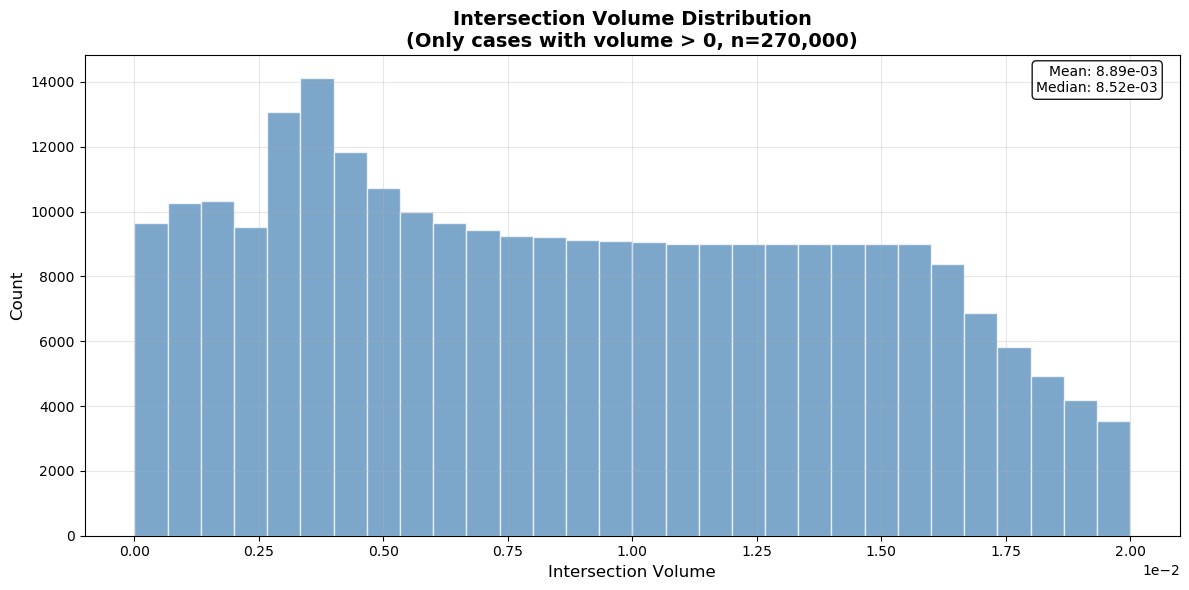

In [10]:
### === Intersection Volume Analysis ===
print("=== Intersection Volume Analysis ===")

total_samples = len(tetrahedron_dataset)
has_intersection = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1]
no_intersection = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0]

# Further break down intersection cases
intersecting_with_volume = has_intersection[has_intersection['IntersectionVolume'] > 0]
intersecting_zero_volume = has_intersection[has_intersection['IntersectionVolume'] == 0]

print(f"Total samples: {total_samples:,}")
print(f"No intersection (HasIntersection=0): {len(no_intersection):,} ({len(no_intersection)/total_samples*100:.1f}%)")
print(f"Has intersection (HasIntersection=1): {len(has_intersection):,} ({len(has_intersection)/total_samples*100:.1f}%)")
print(f"  ├─ With volume > 0: {len(intersecting_with_volume):,} ({len(intersecting_with_volume)/total_samples*100:.1f}%)")
print(f"  └─ With volume = 0 (touching): {len(intersecting_zero_volume):,} ({len(intersecting_zero_volume)/total_samples*100:.1f}%)")

if len(intersecting_with_volume) > 0:
    volume_scale_factor = 1e8  # Scale up for training stability
    # Single plot - just the intersection volume histogram for non-zero volumes
    fig, ax = plt.subplots(figsize=(12, 6))
    
    volumes = intersecting_with_volume['IntersectionVolume'].to_numpy() / volume_scale_factor
    
    ax.hist(volumes, bins=30, color='steelblue', alpha=0.7, edgecolor='white')
    ax.set_title(f'Intersection Volume Distribution\n(Only cases with volume > 0, n={len(volumes):,})', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Intersection Volume', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(alpha=0.3)
    
    # Format x-axis in scientific notation for readability
    ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    
    # Add simple stats
    mean_vol = volumes.mean()
    median_vol = np.median(volumes)
    stats_text = f'Mean: {mean_vol:.2e}\nMedian: {median_vol:.2e}'
    ax.text(0.98, 0.98, stats_text, transform=ax.transAxes, 
            fontsize=10, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))
    
    # Enhanced summary statistics
    print(f"\nIntersection Volume Statistics (for volume > 0 cases):")
    print(f"(Note during training volumes are scaled up by a factor of 1e8 for training stability, here showing original values)")
    print(f"  Mean: {mean_vol:.2e}")
    print(f"  Median: {median_vol:.2e}")
    print(f"  Min: {volumes.min():.2e}")
    print(f"  Max: {volumes.max():.2e}")
    print(f"  Standard deviation: {volumes.std():.2e}")
    
    # Additional insights
    if len(intersecting_zero_volume) > 0:
        print(f"\nKey Insights:")
        print(f"  • {len(intersecting_zero_volume):,} cases have geometric intersection but zero volume")
        print(f"    (likely touching at faces/edges/vertices)")
        print(f"  • {len(intersecting_with_volume):,} cases have actual volumetric overlap")
        print(f"  • Ratio of touching-only to volumetric: {len(intersecting_zero_volume)/len(intersecting_with_volume):.3f}")

    plt.tight_layout()
    plt.show()
    
    
else:
    print("No cases with intersection volume > 0 found")
    if len(intersecting_zero_volume) > 0:
        print(f"However, {len(intersecting_zero_volume):,} cases have intersection but zero volume (touching only)")